#### Problem Set #4: Discrete approximation of an AR(1) process

Name: Li Liu

Date: 6/7/2019

In [126]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy.linalg as LA

(a) Simulate a time series of T = 500 periods of values of z_t

In [127]:
rho = 0.85
mu = 11.4
sigma = 0.7
T = 500

unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [128]:
Z = np.zeros(T)
Z[0] = mu
for i in range(1,T):
    Z[i] = rho*Z[i-1]+(1-rho)*mu+eps_vec[i-1]

Text(0, 0.5, 'Value')

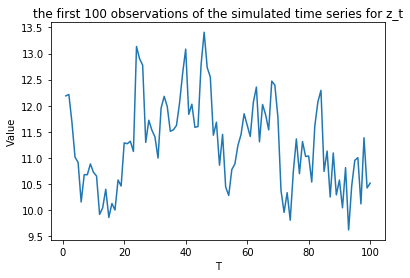

In [129]:
plt.plot(np.arange(1,101), Z[1:101])
plt.title("the first 100 observations of the simulated time series for z_t")
plt.xlabel("T")
plt.ylabel("Value")

(b) A discretized version of all the values that z_t can take on


In [130]:
z_vals = np.linspace(mu-3*sigma, mu+3*sigma, 5)
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

(c) Estimate the probabilities of a 5 × 5 Markov transition matrix

In [131]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_cuts

array([ 9.825, 10.875, 11.925, 12.975])

In [132]:
P = np.zeros((5,5))

def bins(z):
    if z<=z_cuts[0]:
        return 1
    elif (z>z_cuts[0]) & (z<=z_cuts[1]):
        return 2
    elif (z>z_cuts[1]) & (z<=z_cuts[2]):
        return 3
    elif (z>z_cuts[2]) & (z<=z_cuts[3]):
        return 4
    elif z>z_cuts[3]:
        return 5
    
z_bins = np.array([bins(z) for z in Z])

for i in range(1,6):
    for j in range(1, 6):
        P[i-1, j-1] = sum([(z_bins[k]==i) & (z_bins[k+1]==j) for k in range(T-1)])

P = P/(np.tile(P.sum(1), (5,1)).T)
P

array([[0.6875    , 0.27083333, 0.04166667, 0.        , 0.        ],
       [0.09166667, 0.55      , 0.325     , 0.03333333, 0.        ],
       [0.0304878 , 0.2195122 , 0.48170732, 0.23170732, 0.03658537],
       [0.        , 0.04201681, 0.34453782, 0.50420168, 0.1092437 ],
       [0.        , 0.        , 0.04166667, 0.35416667, 0.60416667]])

(d) Probability of z_t+3 being in bin 5 given that z_t is in bin 3

In [133]:
print("The prob is {}%.".format(round(100*np.dot(LA.matrix_power(P.T, 3), [0,0,1,0,0])[4],2)))

The prob is 8.06%.


(e) Stationary (long-run, ergodic) distribution of zt

In [134]:
#by iterating large time
np.dot(LA.matrix_power(P.T, 10000), np.array([1,0,0,0,0]))

array([0.10265479, 0.24205688, 0.32442728, 0.23579876, 0.09506228])

In [135]:
#by eigenvalue-eigenvector decomposition
eigvals, eigvecmat = LA.eig(P.T)
eigvecmat @ np.diag(np.array([1,0,0,0,0])) @ np.linalg.inv(eigvecmat)[0,:]

array([0.10265479, 0.24205688, 0.32442728, 0.23579876, 0.09506228])

(f) Simulate a time series of T values of the discretized version of z_t

In [136]:
Zdis = np.zeros(T)
z_t = z_vals[2]
ind = 2
for t in range(T):
    ind2 = np.argwhere(unif_vec[t] <= np.cumsum(P[ind, :])).min()
    z_n = z_vals[ind2]
    Zdis[t] = z_n
    z_t, ind = z_n, ind2

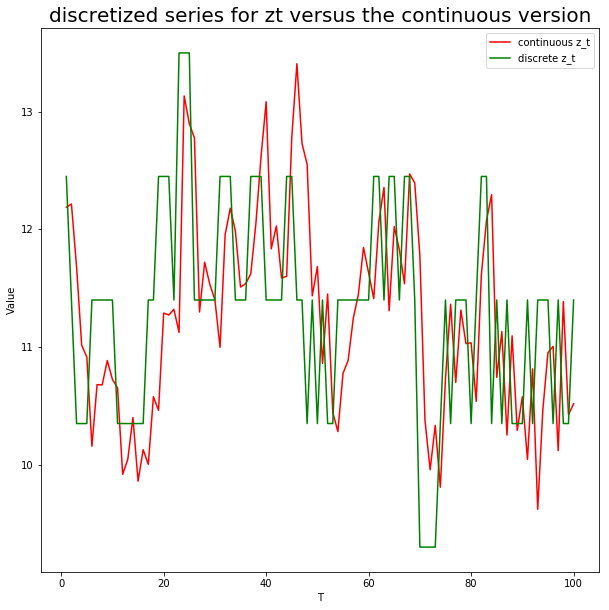

In [137]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(np.arange(1,101), Z[1:101], 'r',label = 'continuous z_t')
ax.plot(np.arange(1,101), Zdis[1:101],'g', label = 'discrete z_t')
ax.set_xlabel('T')
ax.set_ylabel('Value')
ax.set_title('discretized series for zt versus the continuous version', fontsize=20)
ax.legend()